In [1]:
import numpy as np
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

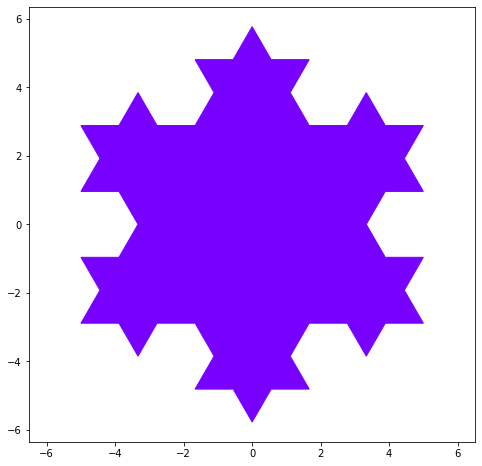

In [5]:
x, y = koch_snowflake(order=2)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y,color='#7700FF')
plt.show()

In [6]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [23]:
def f(order, color='g'):
    x, y = koch_snowflake(order=order)
    plt.figure(figsize=(8, 8))
    plt.axis('equal')
    plt.fill(x, y,color=color)
    plt.show()
    return order

In [25]:
interact(f, order=(1,10,1), color=['r','g','b'])

interactive(children=(IntSlider(value=5, description='order', max=10, min=1), Dropdown(description='color', in…

<function __main__.f(order, color='g')>